In [108]:
import numpy as np
from utils import *
from matplotlib.pyplot import plot

### Mesh Points

In [210]:
nx = 50 
nt = 100
dx = 0.1
dt = 0.01
D = 0.1 #diffusion coeff
mean = 1.
sigma = 0.05

In [211]:
def getMeshPoints(nx,nt,dx,dt):
    x = np.linspace(0,dx*nx,nx)
    t = np.linspace(0,dt*nt,nt)
    return x,t

In [212]:
x,t = getMeshPoints(nx,nt,dx,dt)

### Initial and Boundary Condtions

In [213]:
def I(x,mean=1.,sigma=0.05):
    """Gaussian profile as initial condition."""
    return exp(-0.5*((x-mean/2.0)**2)/sigma**2)

In [214]:
u0 = I(x,mean,sigma)

In [215]:
class TimeStepper:
    def __init__(self,dx,dt,diff_coeff,time_scheme='rk4',acc_order=2):
        self.dx = dx
        self.dt = dt
        self.diff_coeff = diff_coeff
        self.acc_order = acc_order
        self.time_scheme = time_scheme
        self.kernel = getKernel(2,acc_order)
    def _step_(self, ut):
        dt = self.dt
        if self.time_scheme == 'rk4': # classical 4-stage 4th-order Runge–Kutta method
            K1 = self.RightHandItems(ut)
            K2 = self.RightHandItems(ut+dt/2*K1)
            K3 = self.RightHandItems(ut+dt/2*K2)
            K4 = self.RightHandItems(ut+dt*K3)
            rhi = dt/6*(K1+2*K2+2*K3+K4)
        elif self.time_scheme == 'rk2': # 2-stage 2nd-order Runge–Kutta method
            K1 = self.RightHandItems(ut)
            K2 = self.RightHandItems(ut+dt*K1)
            rhi = dt/2*(K1+K2)
        else: # forward Euler
            rhi = dt*self.RightHandItems(ut)
        return rhi
    
    def step(self, ut):
        ut_1 = ut+self._step_(ut)
        return ut_1

    
    #takes the function at time t 
    def RightHandItems(self, ut):
            ## should calculate the rhs a*d2u/dx2
            F = self.diff_coeff/self.dx**2
            ut_padded = padInput(ut,2,self.acc_order)
            uxx_t = np.correlate(ut_padded,self.kernel)    
            return F*uxx_t


In [216]:
ts = TimeStepper(dx,dt,0.1,time_scheme='rk4')
u = np.zeros((nt,nx)) #u(t,x) 

In [217]:
## Loop to generate data for a specified timestep
ut = u0
u[0] = u0 #at time 0
for i in range(1,nt):
    u[i][1:-1] = ts.step(ut[1:-1])
    #boundary condtion
    u[i][0] = 0
    u[i][-1] = 0
    ut = u[i]


In [218]:
X,T = np.meshgrid(x,t)

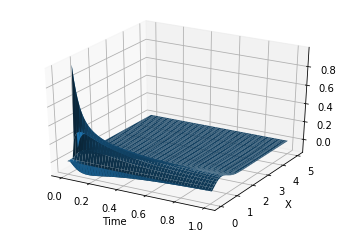

In [228]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T, X, u)
plt.xlabel("Time")
plt.ylabel("X")
plt.show()